In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.optimize import minimize
import math

In [2]:
def print_matrix():
    for i in a:
        print(i)
    print('\n')
    print(b)

# 1) Метод Гаусса

In [7]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5

a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])
b = np.array([-j + 0.05 * j * j, 
              -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
              -10 + 0.03 * j * j - 0.1 * l *j, 
              -0.2 * k + 0.3 * j + 0.02 * j * j, 
              0.01 * k * j - 0.5 * k - 0.2 * j * j])
linalg_solve = np.linalg.solve(a, b)

Прямой ход

In [ ]:
for k in range(n - 1):
    for i in range(k + 1, n):
        r = a[i][k] / a[k][k]
        for j in range(k, n):
            a[i][j] = a[i][j] - (r * a[k][j])
        b[i] = b[i] - (r * b[k])

In [ ]:
for i in range(n):
    for j in range(n):
        print(float('{:.2f}'.format(a[i][j])), end='    ')
    print('\n')
b

3.1    1.55    0.0    0.6    0.0    

0.0    2.33    0.93    -0.3    0.3    

0.0    -0.0    9.63    -0.81    1.38    

0.0    0.0    0.0    2.87    -0.15    

0.0    -0.0    0.0    0.0    2.85    



array([ -2.6195    ,  -0.39525   , -10.4836    ,   0.09577416,
        -1.76547452])

Обратный ход

In [299]:
array_1 = [1] * 5 # x
for k in range(n - 1, -1, -1):
    array_1[k] = ((b[k] - sum([a[k][j] * array_1[j] for j in range(k + 1, n)])) / a[k][k])

In [300]:
for i in range(n):
    print(float('{:.10f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.10f}'.format(array_1[i])), end='  ')

-1.0  0.31  -1.0  0.0  -0.62  

-1.0  0.31  -1.0  0.0  -0.62  

Определитель матрицы

In [301]:
det = 1
for i in range(n):
    for j in range(n):
        if i == j:
            det *= a[i][j]
print(det)

567.5496936075


# 2) Метод Жордана–Гаусса

In [181]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5

a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])
b = np.array([-j + 0.05 * j * j, 
              -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
              -10 + 0.03 * j * j - 0.1 * l *j, 
              -0.2 * k + 0.3 * j + 0.02 * j * j, 
              0.01 * k * j - 0.5 * k - 0.2 * j * j])
linalg_solve = np.linalg.solve(a, b)

In [182]:
print_matrix()

[3.1  1.55 0.   0.6  0.  ]
[1.55 3.1  0.93 0.   0.3 ]
[ 0.    0.93 10.   -0.93  1.5 ]
[ 0.62  0.   -0.93  3.1  -0.31]
[ 0.    0.31  1.55 -0.31  3.1 ]


[ -2.6195  -1.705  -10.6417   0.5022  -3.3759]


In [77]:
for k in range(n):
    for i in range(n):
        if i != k:
            r = a[i][k] / a[k][k]
            b[i] = b[i] - (r * b[k])
            for j in range(k, n):
                a[i][j] = a[i][j] - (r * a[k][j])

In [78]:
array_2 = [1] * 5 # x
for i in range(n):
    array_2[i] = (b[i]/a[i][i])

In [79]:
for i in range(n):
    print(float('{:.5f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.5f}'.format(array_2[i])), end='  ')

-1.0  0.31  -1.0  0.0  -0.62  

-1.0  0.31  -1.0  0.0  -0.62  

# 3) Метод LU–разложения

In [53]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5

a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])
b = np.array([-j + 0.05 * j * j, 
              -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
              -10 + 0.03 * j * j - 0.1 * l *j, 
              -0.2 * k + 0.3 * j + 0.02 * j * j, 
              0.01 * k * j - 0.5 * k - 0.2 * j * j])
linalg_solve = np.linalg.solve(a, b)

In [54]:
print_matrix()

[3.1  1.55 0.   0.6  0.  ]
[1.55 3.1  0.93 0.   0.3 ]
[ 0.    0.93 10.   -0.93  1.5 ]
[ 0.62  0.   -0.93  3.1  -0.31]
[ 0.    0.31  1.55 -0.31  3.1 ]


[ -2.6195  -1.705  -10.6417   0.5022  -3.3759]


In [55]:
L = np.eye(5)
U = np.zeros((5, 5))

In [56]:
for i in range(n):
    for j in range(n):
        tmp = 0.0
        # u
        if i <= j:
            U[i][j] = a[i][j] - sum([L[i][k]*U[k][j] for k in range(i)])
        # l
        else:
            L[i][j] = (a[i][j] - sum([L[i][k]*U[k][j] for k in range(j)]))/U[j][j]

In [57]:
array_3 = [1] * 5 # y
for k in range(n):
    array_3[k] = b[k] - sum([L[k][j] * array_3[j] for j in range(k)])

In [58]:
array_3_1 = [1] * 5 # x
for k in range(n - 1, -1, -1):
    array_3_1[k] = (array_3[k] - sum([U[k][j] * array_3_1[j] for j in range(k + 1, n)]))/U[k][k]

In [59]:
for i in range(n):
    print(float('{:.5f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.5f}'.format(array_3_1[i])), end='  ')

-1.0  0.31  -1.0  0.0  -0.62  

-1.0  0.31  -1.0  -0.0  -0.62  

Определитель матрицы

In [60]:
det = 1
for i in range(n):
    for j in range(n):
        if i == j:
            det *= U[i][j]
print(det)

567.5496936075001


# 4) Метод квадратных корней (схема Холецкого)

In [269]:
NN = 16
j = 1.5 + 0.1 * NN
k = l = NN
m = 1
n = 5
    
a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
                  [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
                  [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
                  [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
                  [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])
b = np.array([-j + 0.05 * j * j, 
                  -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
                  -10 + 0.03 * j * j - 0.1 * l *j, 
                  -0.2 * k + 0.3 * j + 0.02 * j * j, 
                  0.01 * k * j - 0.5 * k - 0.2 * j * j])
linalg_solve = np.linalg.solve(a, b)

In [270]:
print_matrix()

[3.1  1.55 0.   3.2  0.  ]
[1.55 3.1  0.93 0.   1.6 ]
[ 0.    0.93 10.   -0.93  8.  ]
[ 3.2   0.   -0.93  3.1  -0.31]
[ 0.    1.6   8.   -0.31  3.1 ]


[ -2.6195  -2.511  -14.6717  -2.0778  -9.426 ]


In [271]:
import math

In [272]:
d = np.eye(5)
s = np.zeros((5, 5))

In [273]:
for i in range(n):
    d[i][i] = np.sign(a[i][i]-sum([s[p][i]*s[p][i]*d[p][p] for p in range(i)]))
    s[i][i] = np.sqrt(np.abs(a[i][i] - sum([s[p][i]*s[p][i]*d[p][p] for p in range(i)])))
    for j in range(i, n):
        s[i][j] = (a[i][j]-sum([s[p][i]*s[p][j]*d[p][p] for p in range(i)]))/(d[i][i]*s[i][i])

In [274]:
st = s.transpose().dot(d)

In [275]:
array_4 = [1] * 5 # y
for k in range(n):
    array_4[k] = (b[k] - sum([st[k][j] * array_4[j] for j in range(k)]))/st[k][k]

In [276]:
array_4_1 = [1] * 5 # x
for k in range(n - 1, -1, -1):
    array_4_1[k] = (array_4[k] - sum([s[k][j] * array_4_1[j] for j in range(k + 1, n)]))/s[k][k]

In [277]:
for i in range(n):
    print(float('{:.5f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.5f}'.format(array_4_1[i])), end='  ')

-1.0  0.31  -1.0  0.0  -0.62  

-1.0  0.31  -1.0  0.0  -0.62  

# 5) Метод ортогонализации

In [289]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5

a = [[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]]
b = [-j + 0.05 * j * j, 
              -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
              -10 + 0.03 * j * j - 0.1 * l *j, 
              -0.2 * k + 0.3 * j + 0.02 * j * j, 
              0.01 * k * j - 0.5 * k - 0.2 * j * j]
linalg_solve = np.linalg.solve(a, b)

In [290]:
print_matrix()

[3.1, 1.55, 0, 0.6000000000000001, 0]
[1.55, 3.1, 0.9299999999999999, 0, 0.30000000000000004]
[0, 0.9299999999999999, 10, -0.9299999999999999, 1.5]
[0.6200000000000001, 0, -0.9299999999999999, 3.1, -0.31000000000000005]
[0, 0.31000000000000005, 1.55, -0.31000000000000005, 3.1]


[-2.6195, -1.705, -10.6417, 0.5021999999999999, -3.3759000000000006]


In [291]:
for i in range(n):
    a[i].append(-b[i])
a.append([float(i == n) for i in range(n + 1)])

In [292]:
a = np.array(a)

In [293]:
a

array([[ 3.1   ,  1.55  ,  0.    ,  0.6   ,  0.    ,  2.6195],
       [ 1.55  ,  3.1   ,  0.93  ,  0.    ,  0.3   ,  1.705 ],
       [ 0.    ,  0.93  , 10.    , -0.93  ,  1.5   , 10.6417],
       [ 0.62  ,  0.    , -0.93  ,  3.1   , -0.31  , -0.5022],
       [ 0.    ,  0.31  ,  1.55  , -0.31  ,  3.1   ,  3.3759],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ]])

In [294]:
u = np.array([[0.0 for _ in range(n + 1)] for _ in range(n + 1)])
v = np.array([[0.0 for _ in range(n + 1)] for _ in range(n + 1)])

In [295]:
u[0] = a[0]
v[0] = u[0]/np.sqrt(np.dot(u[0], u[0]))

In [296]:
for j in range(1, n + 1):
    u[j] = a[j] - sum([np.dot(a[j], v[i]) * v[i] for i in range(j)])
    v[j] = u[j] / np.sqrt(np.dot(u[j], u[j]))

In [297]:
y = np.array([0.0 for _ in range(n)])
for i in range(n):
    y[i] = u[n][i] / u[n][n] 
y

array([-1.00000000e+00,  3.10000000e-01, -1.00000000e+00, -7.84901658e-17,
       -6.20000000e-01])

In [298]:
for i in range(n):
    print(float('{:.5f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.5f}'.format(y[i])), end='  ')

-1.0  0.31  -1.0  0.0  -0.62  

-1.0  0.31  -1.0  -0.0  -0.62  

# 6) Метод прогонки

In [100]:
NN = 16
j = 1.5 + 0.1 * NN
k = l = 0
m = 1
n = 5
    
a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
                  [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
                  [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
                  [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
                  [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])
r = np.array([-j + 0.05 * j * j, 
                  -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
                  -10 + 0.03 * j * j - 0.1 * l *j, 
                  -0.2 * k + 0.3 * j + 0.02 * j * j, 
                  0.01 * k * j - 0.5 * k - 0.2 * j * j])
linalg_solve = np.linalg.solve(a, r)

In [101]:
print_matrix()

[3.1  1.55 0.   0.   0.  ]
[1.55 3.1  0.93 0.   0.  ]
[ 0.    0.93 10.   -0.93  0.  ]
[ 0.    0.   -0.93  3.1  -0.31]
[ 0.    0.    0.   -0.31  3.1 ]


[ 0.  -3.1  2.   0.   0. ]


In [102]:
c = np.array([0.0] * 5) 
d = np.array([0.0] * 5) 
b = np.array([0.0] * 5) 
for i in range(n):
    for j in range(n):
        if i == j:
            c[i] = a[i][j]
        elif i == j + 1:
            b[i] = a[i][j]
        elif i + 1 == j:
            d[i] = a[i][j]
c, d, b

(array([ 3.1,  3.1, 10. ,  3.1,  3.1]),
 array([ 1.55,  0.93, -0.93, -0.31,  0.  ]),
 array([ 0.  ,  1.55,  0.93, -0.93, -0.31]))

In [103]:
delta = np.array([0.0] * 5) 
_lambda = np.array([0.0] * 5) 

In [104]:
for i in range(n):
    delta[i] = -(d[i] / (c[i] + b[i] * delta[i-1]))
    _lambda[i] = ((r[i] - b[i] * _lambda[i-1]) / (c[i] + b[i] * delta[i-1]))
delta, _lambda

(array([-0.5       , -0.4       ,  0.09659327,  0.10298428, -0.        ]),
 array([-0.845     , -0.09      , -1.        ,  0.06385025, -0.62      ]))

In [105]:
x = np.array([0.0] * 5) 

In [106]:
x[n - 1] = ((r[n - 1] - b[n - 1] * _lambda[n - 2]) / (c[n - 1] + b[n - 1] * delta[n-2]))
for i in range(n - 2, -1, -1):
    x[i] = delta[i] * x[i + 1] + _lambda[i]

In [107]:
for i in range(n):
    print(float('{:.5f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.5f}'.format(x[i])), end='  ')

-1.0  0.31  -1.0  -0.0  -0.62  

-1.0  0.31  -1.0  -0.0  -0.62  

# 7) Метод простых итераций

In [22]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5

a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])
b = np.array([-j + 0.05 * j * j, 
              -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
              -10 + 0.03 * j * j - 0.1 * l *j, 
              -0.2 * k + 0.3 * j + 0.02 * j * j, 
              0.01 * k * j - 0.5 * k - 0.2 * j * j])
linalg_solve = np.linalg.solve(a, b)

In [23]:
print_matrix()

[3.1  1.55 0.   0.6  0.  ]
[1.55 3.1  0.93 0.   0.3 ]
[ 0.    0.93 10.   -0.93  1.5 ]
[ 0.62  0.   -0.93  3.1  -0.31]
[ 0.    0.31  1.55 -0.31  3.1 ]


[ -2.6195  -1.705  -10.6417   0.5022  -3.3759]


In [24]:
E = np.eye(5)
q = 0.6
eps = 0.001
S = q * np.linalg.inv(a)

In [25]:
B = E - S.dot(a)
C = S.dot(b)

In [26]:
x = np.array([[0.0 for _ in range(n)] for _ in range(2)])
x[0] = C
x[1] = B.dot(x[0]) + C

In [27]:
tmp = 0
if np.linalg.norm(B, 'fro') < 1:
    while np.linalg.norm(x[tmp + 1] - x[tmp]) > (((1 - q) / q) * eps):
        tmp += 1
        x = np.append(x, [B.dot(x[tmp]) + C], axis = 0)
else:
    print('Norm > 1')

In [28]:
for i in range(n):
    print(float('{:.5f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.3f}'.format(x[len(x) - 1][i])), end='  ')

-1.0  0.31  -1.0  0.0  -0.62  

-1.0  0.31  -1.0  -0.0  -0.62  

# 8) Метод Якоби

In [11]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5

a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])
b = np.array([-j + 0.05 * j * j, 
              -0.8 * j + 0.1 * j * j - 0.02 * l * j, 
              -10 + 0.03 * j * j - 0.1 * l *j, 
              -0.2 * k + 0.3 * j + 0.02 * j * j, 
              0.01 * k * j - 0.5 * k - 0.2 * j * j])
linalg_solve = np.linalg.solve(a, b)

In [12]:
print_matrix()

[3.1  1.55 0.   0.6  0.  ]
[1.55 3.1  0.93 0.   0.3 ]
[ 0.    0.93 10.   -0.93  1.5 ]
[ 0.62  0.   -0.93  3.1  -0.31]
[ 0.    0.31  1.55 -0.31  3.1 ]


[ -2.6195  -1.705  -10.6417   0.5022  -3.3759]


In [13]:
D = np.eye(5)
L = np.zeros((5, 5))
R = np.zeros((5, 5))
B = np.zeros((5, 5))

In [14]:
for i in range(n):
    for j in range(n):
        if i == j:
            D[i][j] = a[i][j]
        elif i < j:
            R[i][j] = a[i][j]
        else:
            L[i][j] = a[i][j]
D, L, R

(array([[ 3.1,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  3.1,  0. ,  0. ,  0. ],
        [ 0. ,  0. , 10. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  3.1,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  3.1]]),
 array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 1.55,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.93,  0.  ,  0.  ,  0.  ],
        [ 0.62,  0.  , -0.93,  0.  ,  0.  ],
        [ 0.  ,  0.31,  1.55, -0.31,  0.  ]]),
 array([[ 0.  ,  1.55,  0.  ,  0.6 ,  0.  ],
        [ 0.  ,  0.  ,  0.93,  0.  ,  0.3 ],
        [ 0.  ,  0.  ,  0.  , -0.93,  1.5 ],
        [ 0.  ,  0.  ,  0.  ,  0.  , -0.31],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]]))

In [15]:
D_inv = np.linalg.inv(D)

In [17]:
B = -1 * D_inv.dot(L+R)
C = D_inv.dot(b)

In [18]:
x = np.array([[0.0 for _ in range(n)] for _ in range(2)])
x[0] = C
x[1] = B.dot(x[0]) + C

In [19]:
eps = 0.0001
tmp = 0
while np.linalg.norm(x[tmp + 1] - x[tmp]) > (((1 - q) / q) * eps):
    tmp += 1
    x = np.append(x, [B.dot(x[tmp]) + C], axis = 0)

In [20]:
for i in range(n):
    print(float('{:.5f}'.format(linalg_solve[i])), end='  ')
print('\n')
for i in range(n):
    print(float('{:.3f}'.format(x[len(x) - 1][i])), end='  ')

-1.0  0.31  -1.0  0.0  -0.62  

-1.0  0.31  -1.0  -0.0  -0.62  

# 9) Обратная матрица(методом Гаусса)

In [126]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5
a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])

linalg_solve = np.linalg.solve(a, b)

In [128]:
b = np.array([[float(i == j) for i in range(n)] for j in range(n)])
for k in range(n - 1):
        for i in range(k + 1, n):
            r = a[i][k] / a[k][k]
            for j in range(k, n):
                a[i][j] = a[i][j] - (r * a[k][j])
            b[i] = b[i] - (r * b[k])
            
x = np.array([[0.0 for _ in range(n)] for _ in range(n)])
for k in range(n - 1, -1, -1):
    for i in range(n):
        x[k][i] = ((b[k][i] - sum([a[k][j] * x[j][i] for j in range(k + 1, n)])) / a[k][k])
x

array([[ 0.45544618, -0.23230247,  0.01258681, -0.0835715 ,  0.00803334],
       [-0.23222322,  0.45165162, -0.03540522,  0.03198707, -0.02337796],
       [ 0.01228279, -0.0352635 ,  0.11332246,  0.02674479, -0.04874637],
       [-0.08656192,  0.03346273,  0.02643162,  0.3491528 ,  0.01888746],
       [ 0.00842473, -0.02418714, -0.05047754,  0.01834418,  0.35118037]])

In [127]:
print(np.linalg.inv(a))

[[ 0.45544618 -0.23230247  0.01258681 -0.0835715   0.00803334]
 [-0.23222322  0.45165162 -0.03540522  0.03198707 -0.02337796]
 [ 0.01228279 -0.0352635   0.11332246  0.02674479 -0.04874637]
 [-0.08656192  0.03346273  0.02643162  0.3491528   0.01888746]
 [ 0.00842473 -0.02418714 -0.05047754  0.01834418  0.35118037]]


# 10) Решение СЛАУ в комплексном пространстве

In [370]:
NN = 16
i = 1.5 + 0.1 * NN

a = np.array([[1 - i * 1j, 0, -i * 1j], 
              [-i - 2j, -i * 1j, 2 + i * 1j], 
              [1j, 2, i]])
b =  np.array([1 + i - 3 * i * 1j, 
              -3 * i + 4 + 2 * i * 1j, 
              2 * i + (i - 1) * 1j])

n = len(a)
linalg_solve = np.linalg.solve(a, b)

In [371]:
print_matrix()

[ 1.-3.1j  0.+0.j  -0.-3.1j]
[-3.1-2.j  -0. -3.1j  2. +3.1j]
[0. +1.j 2. +0.j 3.1+0.j]


[ 4.1-9.3j -5.3+6.2j  6.2+2.1j]


In [372]:
A_real = np.array([[0.0 for _ in range(n)] for _ in range(n)])
A_imag = np.array([[0.0 for _ in range(n)] for _ in range(n)])
b_real = np.array([0.0 for _ in range(n)])
b_imag = np.array([0.0 for _ in range(n)])

In [373]:
for i in range(n):
    b_real[i] = b[i].real
    b_imag[i] = b[i].imag
    for j in range(n):
        A_real[i][j] = a[i][j].real
        A_imag[i][j] = a[i][j].imag

In [374]:
A_real, A_imag, b_real, b_imag

(array([[ 1. ,  0. , -0. ],
        [-3.1, -0. ,  2. ],
        [ 0. ,  2. ,  3.1]]),
 array([[-3.1,  0. , -3.1],
        [-2. , -3.1,  3.1],
        [ 1. ,  0. ,  0. ]]),
 array([ 4.1, -5.3,  6.2]),
 array([-9.3,  6.2,  2.1]))

In [375]:
C1 = np.concatenate((A_real, A_imag))
C2 = np.concatenate((-A_imag, A_real))
C = np.concatenate((C1, C2), axis = 1)
d = np.concatenate((b_real, b_imag))
C, d

(array([[ 1. ,  0. , -0. ,  3.1, -0. ,  3.1],
        [-3.1, -0. ,  2. ,  2. ,  3.1, -3.1],
        [ 0. ,  2. ,  3.1, -1. , -0. , -0. ],
        [-3.1,  0. , -3.1,  1. ,  0. , -0. ],
        [-2. , -3.1,  3.1, -3.1, -0. ,  2. ],
        [ 1. ,  0. ,  0. ,  0. ,  2. ,  3.1]]),
 array([ 4.1, -5.3,  6.2, -9.3,  6.2,  2.1]))

Воспользуемся методом ортогонализации (5)

In [376]:
tmp = [[C[i][j] for j in range(2 * n)] for i in range(2 * n)]
for i in range(2 * n):
    tmp[i].append(-d[i])
tmp.append([float(i == (2 * n)) for i in range(2 * n + 1)])
C = np.array([[tmp[i][j] for j in range(2 * n + 1)] for i in range(2 * n + 1)])
C

array([[ 1. ,  0. , -0. ,  3.1, -0. ,  3.1, -4.1],
       [-3.1, -0. ,  2. ,  2. ,  3.1, -3.1,  5.3],
       [ 0. ,  2. ,  3.1, -1. , -0. , -0. , -6.2],
       [-3.1,  0. , -3.1,  1. ,  0. , -0. ,  9.3],
       [-2. , -3.1,  3.1, -3.1, -0. ,  2. , -6.2],
       [ 1. ,  0. ,  0. ,  0. ,  2. ,  3.1, -2.1],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [377]:
u = np.array([[0.0 for _ in range(2 * n + 1)] for _ in range(2 * n + 1)])
v = np.array([[0.0 for _ in range(2 * n + 1)] for _ in range(2 * n + 1)])

In [378]:
u[0] = C[0]
v[0] = u[0]/np.sqrt(np.dot(u[0], u[0]))

In [379]:
for j in range(1, 2 * n + 1):
    u[j] = C[j] - sum([np.dot(C[j], v[i]) * v[i] for i in range(j)])
    v[j] = u[j] / np.sqrt(np.dot(u[j], u[j]))

In [380]:
y = np.array([0.0 for _ in range(2 * n)])
for i in range(2 * n):
    y[i] = u[2 * n][i] / u[2 * n][2 * n] 

In [381]:
for i in linalg_solve:
    print('{:.5f}'.format(i.real) + ' ' + '{:.5f}'.format(i.imag) + 'i')
print('\n')
for i in range(3):
    print('{:.5f}'.format(y[i]) + ' ' + '{:.5f}'.format(y[i+3]) + 'i') 

1.00000 -0.00000i
-0.00000 -1.00000i
2.00000 1.00000i


1.00000 -0.00000i
-0.00000 -1.00000i
2.00000 1.00000i


# 11) Максимальное и минимальное по модулю собственные значения и соответствующие им собственные векторы.

Максимальное по модулю собственное значение и вектор

In [5]:
NN = 16
j = 1.5 + 0.1 * NN
k = j
l = k - 0.1
m = 1
n = 5

a = np.array([[j * m, 0.5 * j, 0, 0.2 * l, 0], 
              [0.5 * j, j, 0.3 * j, 0, 0.1 * l], 
              [0, 0.3 * j, 10, -0.3 * j, 0.5 *l], 
              [0.2 * k, 0, -0.3 * j, j, -0.1 * j], 
              [0, 0.1 * k, 0.5 * k, -0.1 * j, j * m]])

In [8]:
print_matrix()

[3.1  1.55 0.   0.6  0.  ]
[1.55 3.1  0.93 0.   0.3 ]
[ 0.    0.93 10.   -0.93  1.5 ]
[ 0.62  0.   -0.93  3.1  -0.31]
[ 0.    0.31  1.55 -0.31  3.1 ]


[ -2.6195  -1.705  -10.6417   0.5022  -3.3759]


In [9]:
eps = 0.001

In [10]:
y0 = [1.0 for _ in range(n)]
y1 = a.dot(y0)
S0 = 0
S1 = 1

In [11]:
while np.abs(S0 - S1) > eps:
    y0 = y1
    y1 = a.dot(y0)
    S0 = S1
    S1 = sum([(y1[i]/y0[i]) for i in range(n)])/n

In [12]:
y1 = y1/np.linalg.norm(y1)

In [13]:
y1

array([ 0.01707149,  0.13140351,  0.96040331, -0.1267273 ,  0.2097793 ])

In [17]:
S1 # Максимальнное собственное значение

10.577192484597251

In [15]:
a.dot(y1) - S1*y1

array([-7.79216504e-06,  4.03796629e-05,  3.93026576e-04, -5.79564345e-05,
        8.54515065e-05])

In [16]:
w, v = np.linalg.eigh(a)
w, v

(array([ 1.41030794,  2.67726677,  2.97676666,  4.74775041, 10.58790822]),
 array([[ 0.70098976,  0.06293541,  0.02612185,  0.70971151, -0.01672471],
        [-0.67344184,  0.18676853,  0.30318954,  0.63434721, -0.131428  ],
        [ 0.04022952,  0.08780408, -0.25385238, -0.06081234, -0.96048574],
        [-0.22680964, -0.50983244, -0.76316593,  0.30030525,  0.12658117],
        [ 0.04503793, -0.83277727,  0.51042187,  0.00564035, -0.20950253]]))

Минимальное по модулю собственное значение и вектор

In [18]:
a = np.linalg.inv(a)

In [19]:
y0 = [1.0 for _ in range(n)]
y1 = a.dot(y0)
S0 = 0
S1 = 1

In [20]:
while np.abs(S0 - S1) > eps:
    y0 = y1
    y1 = a.dot(y0)
    S0 = S1
    S1 = sum([(y1[i]/y0[i]) for i in range(n)])/n

In [21]:
y1 = y1/np.linalg.norm(y1)

In [24]:
1/S1 # Минимальное собственное значение

1.412523554193796

In [23]:
a.dot(y1) - S1*y1

array([ 4.19592461e-04, -3.75514092e-04,  3.15019722e-05, -1.94642904e-04,
       -6.19385875e-05])

# 12) Переопределенные СЛАУ с помощью методов ортогонализации и минимизацией отклонений

In [86]:
def line(a, b, c, x):
    return (c - a * x) / b

In [87]:
def print_matrix():
    for i in a:
        print(i)
    print('\n')
    print(b)

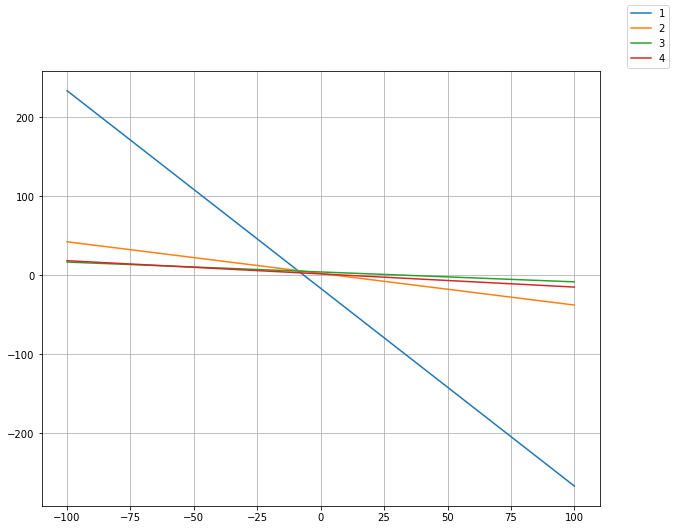

In [88]:
a = np.array([[5, 2]
             ,[2, 5]
             ,[1, 8]
             ,[4, 24]])
b = np.array([-33, 12, 34, 43])

fig, ax = plt.subplots()

xdata = np.linspace(-100, 100, 21)

for i in range(len(a)):
    plt.plot(xdata, line(a[i][0], a[i][1], b[i], xdata), label = f'{i + 1}')
plt.grid()
fig.legend()
fig.set_figwidth(10) 
fig.set_figheight(8)
plt.show()

In [89]:
print_matrix()

[5 2]
[2 5]
[1 8]
[ 4 24]


[-33  12  34  43]


# QR - разложение

In [90]:
q, r = np.linalg.qr(a, mode = 'reduced')
q, r

(array([[-0.73720978,  0.6273687 ],
        [-0.29488391,  0.02138757],
        [-0.14744196, -0.28992039],
        [-0.58976782, -0.72242457]]),
 array([[ -6.78232998, -18.28280256],
        [  0.        , -18.29587742]]))

In [91]:
x_qr = np.linalg.inv(r).dot(b.dot(q))
x_qr

array([-7.62871802,  3.35420184])

# Ортогональный метод с помощью транспонированной матрицы

In [92]:
a_new = (a.T).dot(a)
b_new = (a.T).dot(b)
a_new, b_new

(array([[ 46, 124],
        [124, 669]]),
 array([  65, 1298]))

In [93]:
at = np.linalg.solve(a_new, b_new)
at

array([-7.62871802,  3.35420184])

# Минимизация суммы отклонений от прямых

! Работает только с 2 неизвестными

In [94]:
x, y = sp.symbols('x y')
F_sympy = sum([abs(a[i][0] * x + a[i][1] * y - b[i]) / (a[i][0] * a[i][0] + a[i][1] * a[i][1])**(1 / 2) for i in range(len(a))])
def F(t):
    return sum([abs(a[i][0] * t[0] + a[i][1] * t[1] - b[i]) / (a[i][0] * a[i][0] + a[i][1] * a[i][1])**(1 / 2) 
                for i in range(len(a))])

In [95]:
M = minimize(F, [0, 0], method = "nelder-mead")
M

 final_simplex: (array([[-8.73680676,  5.34208273],
       [-8.7368787 ,  5.34211942],
       [-8.73680607,  5.34205523]]), array([2.57894241, 2.57895523, 2.5789583 ]))
           fun: 2.5789424080157817
       message: 'Optimization terminated successfully.'
          nfev: 179
           nit: 93
        status: 0
       success: True
             x: array([-8.73680676,  5.34208273])

# График

QR - [-7.62871802  3.35420184]
Трансп. матр. - [-7.62871802  3.35420184]
I -> min - [-8.73680676  5.34208273]


Сумма отклонений Qr и At = 4.36008756042177
Сумма отклонений I -> min = 2.57894240801578


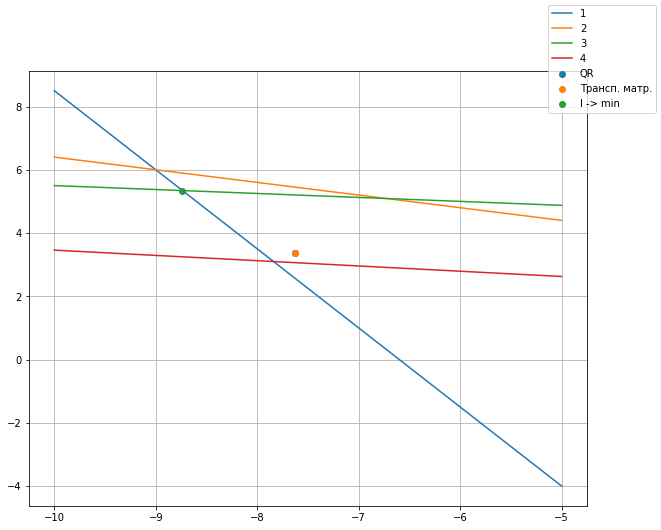

In [96]:
print(f'QR - {x_qr}', f'Трансп. матр. - {at}' , f'I -> min - {M.x}', '\n', sep='\n')
print(f'Сумма отклонений Qr и At = {F_sympy.subs({x : at[0], y : at[1]})}')
print(f'Сумма отклонений I -> min = {F_sympy.subs({x : M.x[0], y : M.x[1]})}')

fig, ax = plt.subplots()

xdata = np.linspace(min(math.ceil(at[0]), math.ceil(M.x[0])) - 2, max(math.ceil(at[0]), math.ceil(M.x[0])) + 2, 100)
for i in range(len(a)):
    plt.plot(xdata, line(a[i][0], a[i][1], b[i], xdata), label = f'{i + 1}')
plt.scatter(x_qr[0], x_qr[1], label = 'QR')
plt.scatter(at[0], at[1], label = 'Трансп. матр.')
plt.scatter(M.x[0], M.x[1], label = 'I -> min')
plt.grid()
fig.legend()
fig.set_figwidth(10) 
fig.set_figheight(8)
plt.show()